In [16]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, BatchNormalization, GlobalAveragePooling2D, Flatten, Resizing, Input, Lambda, Dropout
from keras.models import Sequential
from keras.applications.efficientnet_v2 import EfficientNetV2B2, preprocess_input 
from keras.datasets import cifar10

sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(
    allow_soft_placement=True,
    log_device_placement=True))

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: NVIDIA GeForce RTX 3070 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6



In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 92s 1us/step


In [3]:
conv_base = EfficientNetV2B2(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
conv_base.trainable = True

In [4]:
conv_base.summary()

Model: "efficientnetv2-b2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  0           ['rescaling[0][0]']              
                                                                                                  
 stem_conv (Conv2D)             (None, 112, 112, 32  864         ['normalization[0

In [ ]:
for layer in conv_base.layers:
  if not layer.name.startswith(('top', 'block6')):
    layer.trainable = False

In [ ]:
conv_base.summary()

Model: "efficientnetv2-b2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_1 (Rescaling)        (None, 224, 224, 3)  0           ['input_6[0][0]']                
                                                                                                  
 normalization_1 (Normalization  (None, 224, 224, 3)  0          ['rescaling_1[0][0]']            
 )                                                                                                
                                                                                  

In [ ]:
# import imgaug.augmenters as iaa
# import numpy as np
#
#
# aug = iaa.SomeOf((1, 3),[
#     iaa.Affine(rotate=40),
#     iaa.AdditiveGaussianNoise(scale=0.1*255),
#     iaa.Add(20, per_channel=True),
#     iaa.Sharpen(alpha=0.2),
#     iaa.Affine(translate_px={"x":-10})
# ])
#
#
# x_train_aug = aug(images=x_train)

In [ ]:
# x_train = np.concatenate([x_train, x_train_aug])
# y_train = np.concatenate([y_train, y_train])

In [5]:
inputs = Input(shape=(32, 32, 3))
x = Resizing(224, 224)(inputs)
x = Lambda(lambda x: preprocess_input(x))(x)
x = conv_base(x)
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001), kernel_initializer='he_uniform')(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
x = Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001), kernel_initializer='he_uniform')(x)
x = BatchNormalization()(x)
output = Dense(10, activation='softmax')(x)
model = tf.keras.Model(inputs, output)

In [6]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 resizing (Resizing)         (None, 224, 224, 3)       0         
                                                                 
 lambda (Lambda)             (None, 224, 224, 3)       0         
                                                                 
 efficientnetv2-b2 (Function  (None, 7, 7, 1408)       8769374   
 al)                                                             
                                                                 
 global_average_pooling2d (G  (None, 1408)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 1408)              0     

In [13]:
# model.compile(
#     optimizer='adam',
#     loss=tf.keras.losses.SparseCategoricalCrossentropy(),
#     metrics=['acc']
# )

if tf.config.list_physical_devices('GPU'):
    # Returns a dict in the form {'current': <current mem usage>,
    #                             'peak': <peak mem usage>}
    print(tf.config.experimental.get_memory_info('GPU:0'))

{'current': 431173376, 'peak': 5757071360}


In [17]:
history = model.fit(
    x_train,
    y_train,
    epochs=3,
    batch_size=64,
    validation_data=(x_test, y_test)
)

Epoch 1/3


ResourceExhaustedError: Graph execution error:

Detected at node 'model/efficientnetv2-b2/block6c_expand_bn/FusedBatchNormV3' defined at (most recent call last):
    File "C:\Users\User\AppData\Local\Programs\Python\Python39\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\User\AppData\Local\Programs\Python\Python39\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\User\.virtualenvs\coursera_work-8-8ZJSfm\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\User\.virtualenvs\coursera_work-8-8ZJSfm\lib\site-packages\traitlets\config\application.py", line 976, in launch_instance
      app.start()
    File "C:\Users\User\.virtualenvs\coursera_work-8-8ZJSfm\lib\site-packages\ipykernel\kernelapp.py", line 712, in start
      self.io_loop.start()
    File "C:\Users\User\.virtualenvs\coursera_work-8-8ZJSfm\lib\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\User\AppData\Local\Programs\Python\Python39\lib\asyncio\base_events.py", line 596, in run_forever
      self._run_once()
    File "C:\Users\User\AppData\Local\Programs\Python\Python39\lib\asyncio\base_events.py", line 1890, in _run_once
      handle._run()
    File "C:\Users\User\AppData\Local\Programs\Python\Python39\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\User\.virtualenvs\coursera_work-8-8ZJSfm\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "C:\Users\User\.virtualenvs\coursera_work-8-8ZJSfm\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "C:\Users\User\.virtualenvs\coursera_work-8-8ZJSfm\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "C:\Users\User\.virtualenvs\coursera_work-8-8ZJSfm\lib\site-packages\ipykernel\kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "C:\Users\User\.virtualenvs\coursera_work-8-8ZJSfm\lib\site-packages\ipykernel\ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "C:\Users\User\.virtualenvs\coursera_work-8-8ZJSfm\lib\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\User\.virtualenvs\coursera_work-8-8ZJSfm\lib\site-packages\IPython\core\interactiveshell.py", line 2881, in run_cell
      result = self._run_cell(
    File "C:\Users\User\.virtualenvs\coursera_work-8-8ZJSfm\lib\site-packages\IPython\core\interactiveshell.py", line 2936, in _run_cell
      return runner(coro)
    File "C:\Users\User\.virtualenvs\coursera_work-8-8ZJSfm\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\User\.virtualenvs\coursera_work-8-8ZJSfm\lib\site-packages\IPython\core\interactiveshell.py", line 3135, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\User\.virtualenvs\coursera_work-8-8ZJSfm\lib\site-packages\IPython\core\interactiveshell.py", line 3338, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\User\.virtualenvs\coursera_work-8-8ZJSfm\lib\site-packages\IPython\core\interactiveshell.py", line 3398, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\User\AppData\Local\Temp\ipykernel_15192\556406522.py", line 1, in <cell line: 1>
      history = model.fit(
    File "C:\Users\User\.virtualenvs\coursera_work-8-8ZJSfm\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\User\.virtualenvs\coursera_work-8-8ZJSfm\lib\site-packages\keras\engine\training.py", line 1409, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\User\.virtualenvs\coursera_work-8-8ZJSfm\lib\site-packages\keras\engine\training.py", line 1051, in train_function
      return step_function(self, iterator)
    File "C:\Users\User\.virtualenvs\coursera_work-8-8ZJSfm\lib\site-packages\keras\engine\training.py", line 1040, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\User\.virtualenvs\coursera_work-8-8ZJSfm\lib\site-packages\keras\engine\training.py", line 1030, in run_step
      outputs = model.train_step(data)
    File "C:\Users\User\.virtualenvs\coursera_work-8-8ZJSfm\lib\site-packages\keras\engine\training.py", line 889, in train_step
      y_pred = self(x, training=True)
    File "C:\Users\User\.virtualenvs\coursera_work-8-8ZJSfm\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\User\.virtualenvs\coursera_work-8-8ZJSfm\lib\site-packages\keras\engine\training.py", line 490, in __call__
      return super().__call__(*args, **kwargs)
    File "C:\Users\User\.virtualenvs\coursera_work-8-8ZJSfm\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\User\.virtualenvs\coursera_work-8-8ZJSfm\lib\site-packages\keras\engine\base_layer.py", line 1014, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\User\.virtualenvs\coursera_work-8-8ZJSfm\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\User\.virtualenvs\coursera_work-8-8ZJSfm\lib\site-packages\keras\engine\functional.py", line 458, in call
      return self._run_internal_graph(
    File "C:\Users\User\.virtualenvs\coursera_work-8-8ZJSfm\lib\site-packages\keras\engine\functional.py", line 596, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "C:\Users\User\.virtualenvs\coursera_work-8-8ZJSfm\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\User\.virtualenvs\coursera_work-8-8ZJSfm\lib\site-packages\keras\engine\training.py", line 490, in __call__
      return super().__call__(*args, **kwargs)
    File "C:\Users\User\.virtualenvs\coursera_work-8-8ZJSfm\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\User\.virtualenvs\coursera_work-8-8ZJSfm\lib\site-packages\keras\engine\base_layer.py", line 1014, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\User\.virtualenvs\coursera_work-8-8ZJSfm\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\User\.virtualenvs\coursera_work-8-8ZJSfm\lib\site-packages\keras\engine\functional.py", line 458, in call
      return self._run_internal_graph(
    File "C:\Users\User\.virtualenvs\coursera_work-8-8ZJSfm\lib\site-packages\keras\engine\functional.py", line 596, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "C:\Users\User\.virtualenvs\coursera_work-8-8ZJSfm\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\User\.virtualenvs\coursera_work-8-8ZJSfm\lib\site-packages\keras\engine\base_layer.py", line 1014, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\User\.virtualenvs\coursera_work-8-8ZJSfm\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\User\.virtualenvs\coursera_work-8-8ZJSfm\lib\site-packages\keras\layers\normalization\batch_normalization.py", line 750, in call
      outputs = self._fused_batch_norm(inputs, training=training)
    File "C:\Users\User\.virtualenvs\coursera_work-8-8ZJSfm\lib\site-packages\keras\layers\normalization\batch_normalization.py", line 594, in _fused_batch_norm
      output, mean, variance = control_flow_util.smart_cond(
    File "C:\Users\User\.virtualenvs\coursera_work-8-8ZJSfm\lib\site-packages\keras\utils\control_flow_util.py", line 105, in smart_cond
      return tf.__internal__.smart_cond.smart_cond(
    File "C:\Users\User\.virtualenvs\coursera_work-8-8ZJSfm\lib\site-packages\keras\layers\normalization\batch_normalization.py", line 571, in _fused_batch_norm_training
      return tf.compat.v1.nn.fused_batch_norm(
Node: 'model/efficientnetv2-b2/block6c_expand_bn/FusedBatchNormV3'
OOM when allocating tensor with shape[1248] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node model/efficientnetv2-b2/block6c_expand_bn/FusedBatchNormV3}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_49559]

(0.6, 1.0)

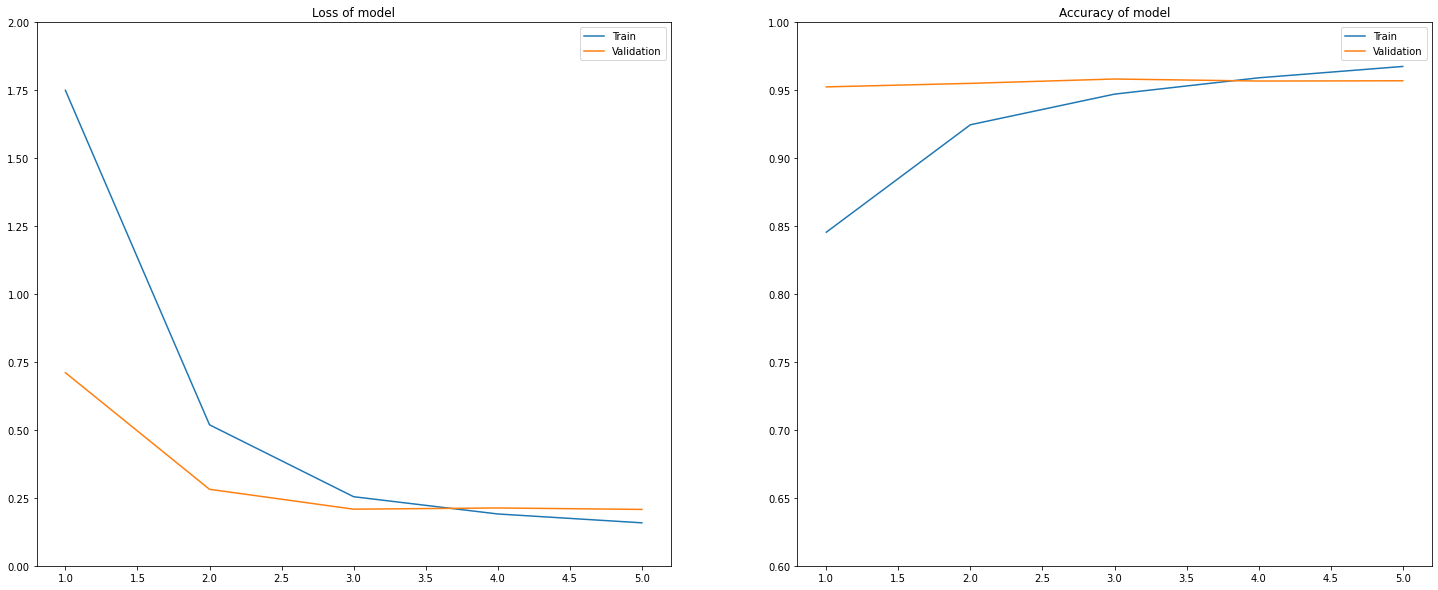

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history

epochs = [i for i in range(1, 6)]
fig, ax = plt.subplots(1, 2)

fig.set_figheight(10)
fig.set_figwidth(25)

ax[0].set_title("Loss of model")
ax[0].plot(epochs, history_dict['loss'], label='Train')
ax[0].plot(epochs, history_dict['val_loss'], label='Validation')
ax[0].legend()
ax[0].set_ylim([0, 2.])

ax[1].set_title("Accuracy of model")
ax[1].plot(epochs, history_dict['acc'], label='Train')
ax[1].plot(epochs, history_dict['val_acc'], label='Validation')
ax[1].legend()
ax[1].set_ylim([0.6, 1.0])

In [ ]:
from pathlib import Path
from PIL import Image



images = (img for img in Path('/content/images').iterdir())

def find_img_prediction(path, model=model):
  f = Image.open(path)
  fig, ax = plt.subplots(1, 2)
  fig.set_figheight(10)
  fig.set_figwidth(15)
  ax[0].imshow(f)
  img_array = tf.keras.preprocessing.image.img_to_array(f)
  resized_img_array = tf.image.resize(img_array, (32, 32))
  valid_array = np.stack((resized_img_array,), axis=0)

  prediction = model.predict(valid_array)
  ax[1].bar(height=prediction.flatten(), x=[str(i) for i in range(10)])

  class_names = ['airplane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog',
                   'horse', 'ship', 'truck']
  return class_names[np.argmax(prediction)]
